In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# mount the drive
from google.colab import drive
drive.mount('/gdrive')
#%cd /gdrive

Mounted at /gdrive


In [3]:
ROOT_DIR = '/gdrive/MyDrive/2023_DSKUS/EDA/'
DATASET_DIR = ROOT_DIR + '/datasets/'

In [78]:
df = pd.read_csv(DATASET_DIR + "45ed633d-f89e-4012-a8d2-c4a0f227034b_Data.csv")

In [79]:
len(df["Country Name"].value_counts().index)

89

In [6]:
df["Series Name"].value_counts().index

Index(['Annual freshwater withdrawals, agriculture (% of total freshwater withdrawal)',
       'Annual freshwater withdrawals, domestic (% of total freshwater withdrawal)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'People using safely managed sanitation services (% of population)',
       'People using at least basic sanitation services, urban (% of urban population)',
       'People using at least basic sanitation services, rural (% of rural population)',
       'People using at least basic sanitation services (% of population)',
       'Water productivity, total (constant 2015 US$ GDP per cubic meter of total freshwater withdrawal)',
       'Renewable internal freshwater resources, total (billion cubic meters)',
       'Renewable internal freshwater resources per capita (cubic meters)',
       'Public private partnerships investment in water and sanitation (current US$)',
       'People with basic handwashing facilities including

# Null value preprocessing

In [7]:
interest_list = [# sanitation
                "People using safely managed sanitation services (% of population)",
                'People using at least basic sanitation services (% of population)',
                'People using at least basic sanitation services, rural (% of rural population)',
                'People using at least basic sanitation services, urban (% of urban population)',
                'People using safely managed sanitation services (% of population)',
                'People using safely managed sanitation services, rural (% of rural population)',
                'People using safely managed sanitation services, urban (% of urban population)',
                 
                'People with basic handwashing facilities including soap and water, urban (% of urban population)',
                'People with basic handwashing facilities including soap and water, rural (% of rural population)',
                'People with basic handwashing facilities including soap and water (% of population)',
                # drinking
                'People using safely managed drinking water services, urban (% of urban population)',
                'People using safely managed drinking water services, rural (% of rural population)',
                'People using safely managed drinking water services (% of population)',
                'People using at least basic drinking water services, urban (% of urban population)',
                'People using at least basic drinking water services, rural (% of rural population)',
                'People using at least basic drinking water services (% of population)',
                # mortality with unsafe water & sanitation & hygiene
                'Mortality rate attributed to unsafe water, unsafe sanitation and lack of hygiene (per 100,000 population)',
                # investment
                'Public private partnerships investment in water and sanitation (current US$)',
                'Investment in water and sanitation with private participation (current US$)',
                ]

In [8]:
import numpy as np
df["Series Name"] = df["Series Name"].apply(lambda x: x if x in interest_list else np.NaN)
df.dropna(axis=0, inplace=True, subset=["Series Name"])
df = df.reset_index()

In [9]:
df["Country Name"].value_counts()

Afghanistan              18
New Zealand              18
Peru                     18
Paraguay                 18
Papua New Guinea         18
                         ..
Fiji                     18
El Salvador              18
Ecuador                  18
Dominican Republic       18
Virgin Islands (U.S.)    18
Name: Country Name, Length: 87, dtype: int64

drop non-southasia and non-latinamerica

In [10]:
Non_list = ["Micronesia, Fed. Sts.", "American Samoa", "Guam", "French Polynesia",
            "New Caledonia","Northern Mariana Islands", "Nauru" ,"Korea, Rep."
            , "Japan", "Marshall Islands", "Maldives", "St. Lucia", "Solomon Islands",
            "Australia", "Fiji", "Sri Lanka", "Papua New Guinea",
            "Vanuatu", "Uruguay", "New Zealand", "Argentina",
            "Bolivia", "Hong Kong SAR, China", "Macao SAR, China",
            "Palau", "Chile", "India", "Tuvalu", "Korea, Dem. People's Rep.",
            "Samoa", "Peru", "Tonga", "Afghanistan", "Paraguay", "Pakistan",
            "Kiribati", "China", "Brazil", "Nepal", "Mongolia", "Bhutan", "Suriname"
    ]

In [11]:
df = df[~df["Country Name"].isin(Non_list)]

In [13]:
df["Country Name"].value_counts().index

Index(['Antigua and Barbuda', 'Indonesia', 'Lao PDR', 'Malaysia', 'Mexico',
       'Myanmar', 'Nicaragua', 'Panama', 'Philippines', 'Puerto Rico',
       'Singapore', 'Sint Maarten (Dutch part)', 'St. Kitts and Nevis',
       'St. Martin (French part)', 'St. Vincent and the Grenadines',
       'Thailand', 'Timor-Leste', 'Trinidad and Tobago',
       'Turks and Caicos Islands', 'Venezuela, RB', 'Vietnam', 'Jamaica',
       'Honduras', 'Aruba', 'Haiti', 'Bahamas, The', 'Bangladesh', 'Barbados',
       'Belize', 'British Virgin Islands', 'Brunei Darussalam', 'Cambodia',
       'Cayman Islands', 'Colombia', 'Costa Rica', 'Cuba', 'Curacao',
       'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Grenada',
       'Guatemala', 'Guyana', 'Virgin Islands (U.S.)'],
      dtype='object')

In [14]:
asia_list = ['Indonesia', 'Lao PDR', 'Malaysia', 'Myanmar','Philippines',
             'Singapore','Thailand','Timor-Leste','Trinidad and Tobago',
             'Turks and Caicos Islands', 'Vietnam','Bangladesh','Brunei Darussalam',
             'Cambodia',]
latin_list  = list(set(df["Country Name"].value_counts().index) - set(asia_list))

In [16]:
df["Country Name"].value_counts().index

Index(['Antigua and Barbuda', 'Indonesia', 'Lao PDR', 'Malaysia', 'Mexico',
       'Myanmar', 'Nicaragua', 'Panama', 'Philippines', 'Puerto Rico',
       'Singapore', 'Sint Maarten (Dutch part)', 'St. Kitts and Nevis',
       'St. Martin (French part)', 'St. Vincent and the Grenadines',
       'Thailand', 'Timor-Leste', 'Trinidad and Tobago',
       'Turks and Caicos Islands', 'Venezuela, RB', 'Vietnam', 'Jamaica',
       'Honduras', 'Aruba', 'Haiti', 'Bahamas, The', 'Bangladesh', 'Barbados',
       'Belize', 'British Virgin Islands', 'Brunei Darussalam', 'Cambodia',
       'Cayman Islands', 'Colombia', 'Costa Rica', 'Cuba', 'Curacao',
       'Dominica', 'Dominican Republic', 'Ecuador', 'El Salvador', 'Grenada',
       'Guatemala', 'Guyana', 'Virgin Islands (U.S.)'],
      dtype='object')

There are lots of null value in 1960-1999, so I'll drop it


In [17]:
# replace value to NaN
df.replace("..", np.NaN, inplace=True)

In [18]:
df.columns

Index(['index', 'Country Name', 'Country Code', 'Series Name', 'Series Code',
       '1960 [YR1960]', '1961 [YR1961]', '1962 [YR1962]', '1963 [YR1963]',
       '1964 [YR1964]', '1965 [YR1965]', '1966 [YR1966]', '1967 [YR1967]',
       '1968 [YR1968]', '1969 [YR1969]', '1970 [YR1970]', '1971 [YR1971]',
       '1972 [YR1972]', '1973 [YR1973]', '1974 [YR1974]', '1975 [YR1975]',
       '1976 [YR1976]', '1977 [YR1977]', '1978 [YR1978]', '1979 [YR1979]',
       '1980 [YR1980]', '1981 [YR1981]', '1982 [YR1982]', '1983 [YR1983]',
       '1984 [YR1984]', '1985 [YR1985]', '1986 [YR1986]', '1987 [YR1987]',
       '1988 [YR1988]', '1989 [YR1989]', '1990 [YR1990]', '1991 [YR1991]',
       '1992 [YR1992]', '1993 [YR1993]', '1994 [YR1994]', '1995 [YR1995]',
       '1996 [YR1996]', '1997 [YR1997]', '1998 [YR1998]', '1999 [YR1999]',
       '2000 [YR2000]', '2001 [YR2001]', '2002 [YR2002]', '2003 [YR2003]',
       '2004 [YR2004]', '2005 [YR2005]', '2006 [YR2006]', '2007 [YR2007]',
       '2008 [YR2008]'

In [19]:
##### Drop 1960-2021 data #####
columns = df.columns

# Remove 40 columns starting from the fifth column
start_column = 4  # Index of the fifth column (0-indexed)
end_column = start_column + 41  # Index of the 40th column
columns_to_remove = columns[start_column:end_column]
df = df.drop(columns=columns_to_remove)

In [20]:
# Calculate the number of null values in each row
null_count = df.isnull().sum(axis=1)

# Extract rows where null count is 10 or more
rows_with_nulls = df[null_count >= 10]

# Extract the "Country Name" and "Series Name" columns for these rows
country_name = rows_with_nulls["Country Code"]
country_name_ =  rows_with_nulls["Country Name"]
series_name = rows_with_nulls["Series Name"]

# Display the results
print("Country Name:")
print(country_name)

print("\nSeries Name:")
print(series_name)

Country Name:
36      ATG
37      ATG
39      ATG
40      ATG
41      ATG
       ... 
1561    VIR
1562    VIR
1563    VIR
1564    VIR
1565    VIR
Name: Country Code, Length: 505, dtype: object

Series Name:
36      Investment in water and sanitation with privat...
37      Mortality rate attributed to unsafe water, uns...
39      People using at least basic drinking water ser...
40      People using at least basic drinking water ser...
41      People using safely managed drinking water ser...
                              ...                        
1561    People using at least basic sanitation service...
1562    People using at least basic sanitation service...
1563    People using safely managed sanitation service...
1564    People using safely managed sanitation service...
1565    People using safely managed sanitation service...
Name: Series Name, Length: 505, dtype: object


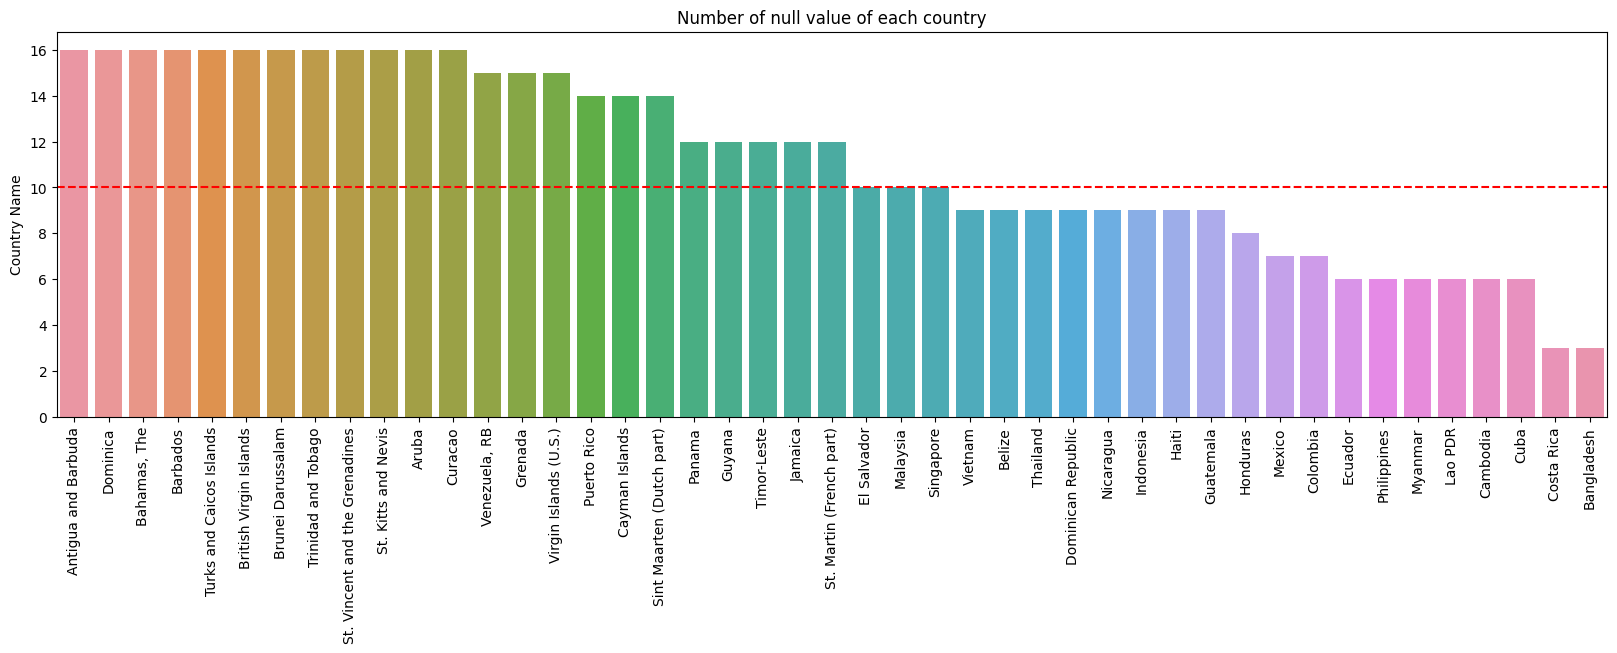

In [21]:
plt.figure(figsize=(20,5))
plt.title("Number of null value of each country")
plt.ylabel("# of null value >= 10")
plt.xticks(rotation=90)
plt.axhline(10, color="r", linestyle="--")
sns.barplot(x=country_name_.value_counts().index, y=country_name_.value_counts())
plt.show()

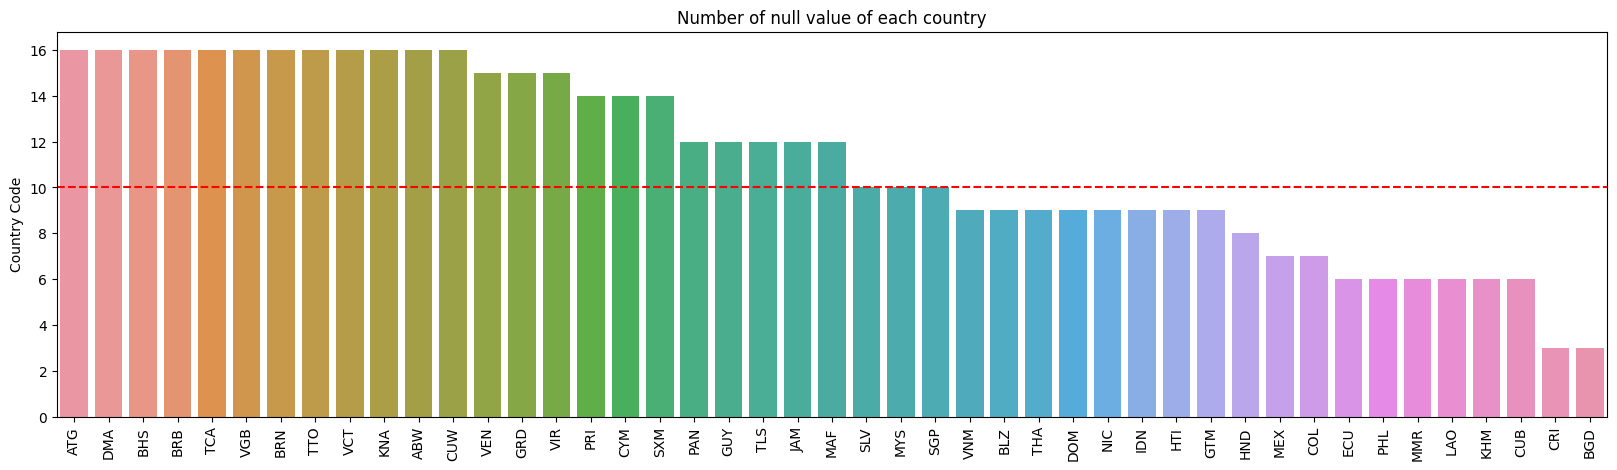

In [22]:
plt.figure(figsize=(20,5))
plt.title("Number of null value of each country")
plt.ylabel("# of null value >= 10")
plt.xticks(rotation=90)
plt.axhline(10, color="r", linestyle="--")
sns.barplot(x=country_name.value_counts().index, y=country_name.value_counts())
plt.show()

In [23]:
country_name_count = rows_with_nulls["Country Code"].value_counts()
countries_to_remain = country_name_count[country_name_count <= 10].index
df = df[df["Country Code"].isin(countries_to_remain)]

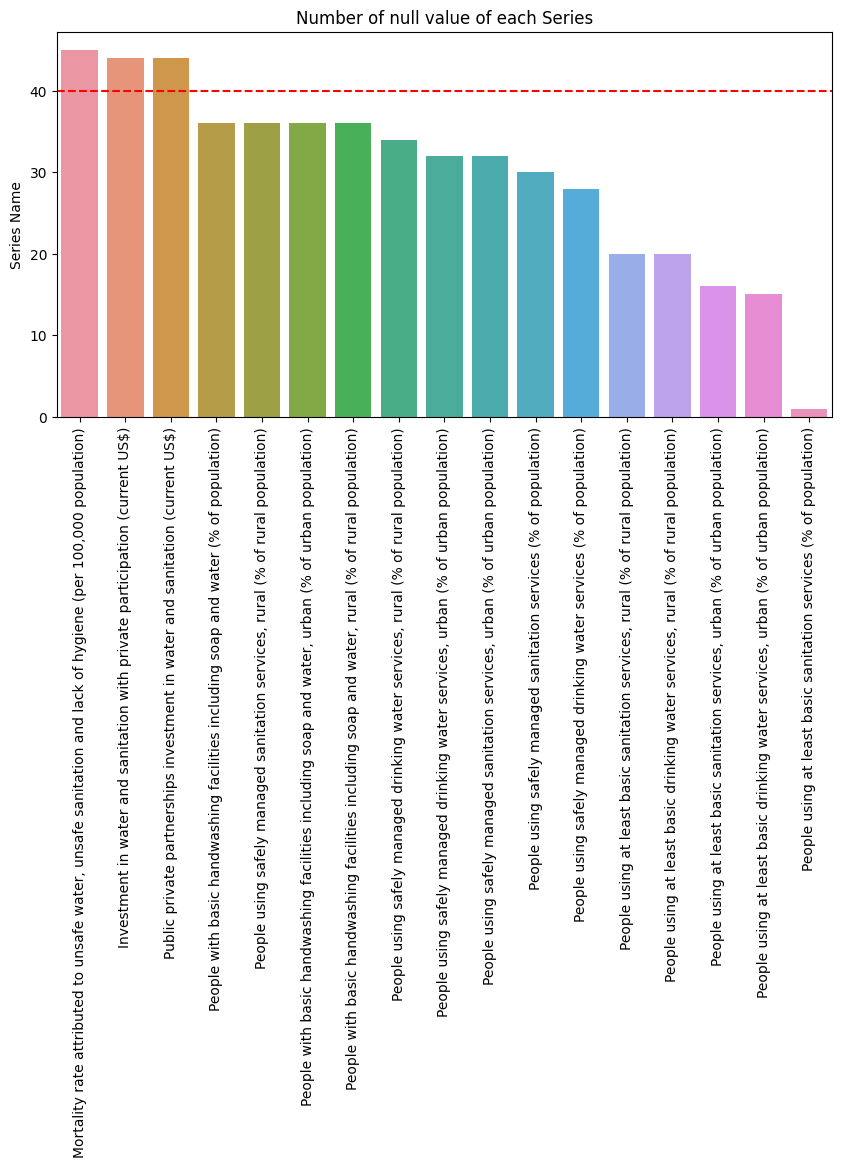

In [24]:
plt.figure(figsize=(10,5))
plt.title("Number of null value of each Series")
plt.ylabel("# of null value >= 10")
plt.xticks(rotation=90)
plt.axhline(40, color="r", linestyle="--")
sns.barplot(x=series_name.value_counts().index, y=series_name.value_counts())
plt.show()

In [25]:
series_name_count = rows_with_nulls["Series Name"].value_counts()
series_to_remain = series_name_count[series_name_count <= 40].index
df = df[df["Series Name"].isin(series_to_remain)]

In [26]:
series_to_remain

Index(['People with basic handwashing facilities including soap and water (% of population)',
       'People using safely managed sanitation services, rural (% of rural population)',
       'People with basic handwashing facilities including soap and water, urban (% of urban population)',
       'People with basic handwashing facilities including soap and water, rural (% of rural population)',
       'People using safely managed drinking water services, rural (% of rural population)',
       'People using safely managed drinking water services, urban (% of urban population)',
       'People using safely managed sanitation services, urban (% of urban population)',
       'People using safely managed sanitation services (% of population)',
       'People using safely managed drinking water services (% of population)',
       'People using at least basic sanitation services, rural (% of rural population)',
       'People using at least basic drinking water services, rural (% of rural popu

In [27]:
df.shape

(308, 26)

# Plotting all values

In [57]:
import matplotlib.pyplot as plt

def plotting(df, CountryCode, SeriesName):
    """
    plotting annual country given Country Code and Series Name
    """
    # get series
    series = df[df["Country Code"] == CountryCode]
    series = series[series["Series Name"] == SeriesName]

    #generate X, y balue
    Xs = [i for i in range(2001, 2022)]
    y_indices = [j for j in range(5, 26)]
    ys = series.iloc[:, y_indices].values[0].tolist()
    # NaN values are recorded as "..", so convert it to 0
    for idx, y in enumerate(ys):
        if y == "..":
            ys[idx] = 0
        else:
            ys[idx] = float(ys[idx])
    
    #plotting
    # plt.title(CountryCode)
    plt.ylim([0, 100])
    plt.yticks([i for i in range(0, 101,20)])
    # plt.ylabel(SeriesName)
    plt.xticks([i for i in range(2001, 2022,5)], rotation=45)
    plt.plot(Xs, ys)
    

    

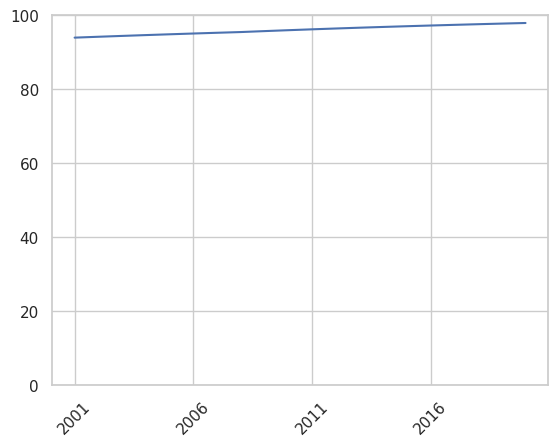

In [58]:
plotting(df, "CRI", 'People using at least basic sanitation services (% of population)')

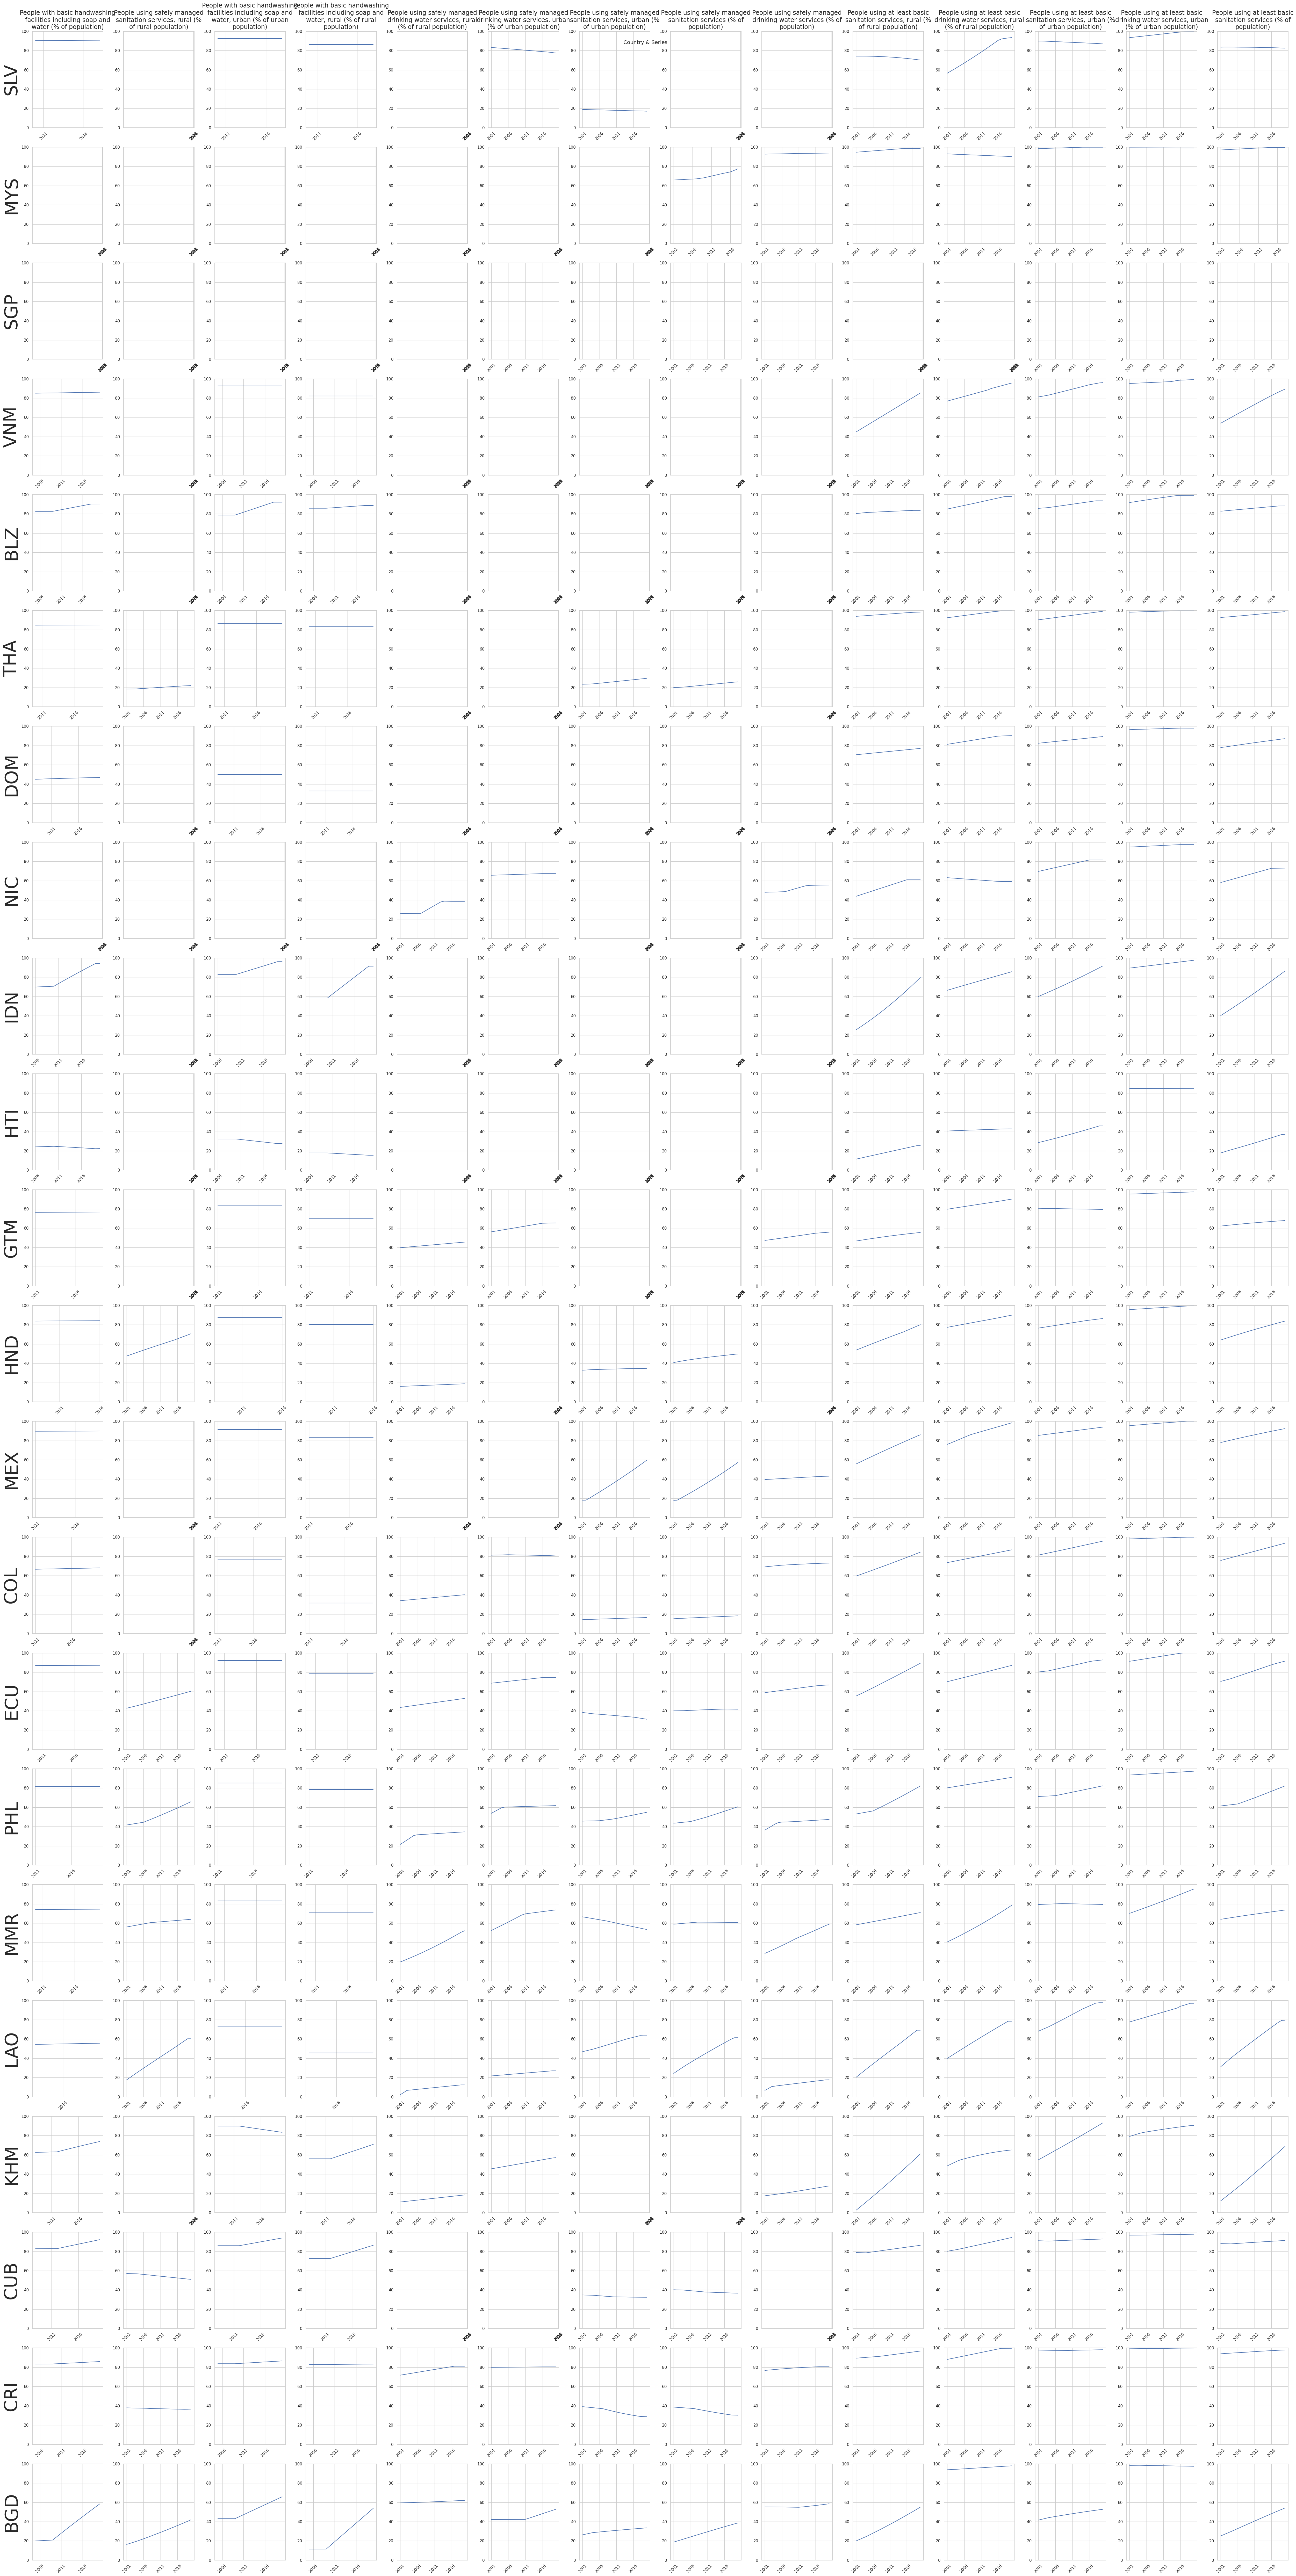

In [76]:
from textwrap import wrap

# CountryList = df["Country Code"].value_counts().index
plt.figure(figsize = (50,100))
idx = 0

for colnum, Country in enumerate(countries_to_remain):
    for rownum, Series in enumerate(series_to_remain):
        idx += 1
        plt.subplot(len(countries_to_remain), len(series_to_remain), idx)
        plotting(df, Country, Series)
        if rownum == 0:
            plt.ylabel(Country, fontsize=50)
        if colnum == 0:
            plt.title("\n".join(wrap(Series, 30)), fontsize=17)
            # plt.text(-0.3, 0.5, Series, fontsize=14, ha='left', va='center', rotation='vertical', wrap=True)
            # plt.text(0.5, 1.1, Series, ha='center', va='bottom', wrap=True)
plt.suptitle("Country & Series")
plt.tight_layout()
plt.show()

In [31]:
df2 = df.copy()

# Correlation

In [32]:
def extract_and_transform_data(df, CountryCode):
    """
    Extracts rows from a DataFrame where "Country Code" matches the given CountryCode,
    transforms the data by setting "Series Name" as a new column, and drops the index
    column and "Country Name" column.
    
    Args:
        df (pd.DataFrame): The DataFrame to extract and transform.
        CountryCode (str): The Country Code to match.
    
    Returns:
        pd.DataFrame: The extracted and transformed DataFrame.
    """
    # Extract rows where "Country Code" matches CountryCode
    extracted_rows = df[df["Country Code"] == CountryCode]
    
    # Set "Series Name" as a new column and replace existing columns with rows
    transformed_data = extracted_rows.set_index("Series Name").T.reset_index().set_index("index")[1:]
    
    # # Drop index column and "Country Name" column
    transformed_data = transformed_data.drop(["Country Name", "Country Code"], axis=0)
    
    return transformed_data

# Selected Country in Map

In [33]:
import folium
import requests
from json import JSONDecodeError
country_geojson_url = 'https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson'
response = requests.get(country_geojson_url)
response.raise_for_status()
country_geojson = response.json()


In [34]:
from pprint import pprint
def getCountryMap(country_geojson=country_geojson, countrycode="AFG"):
    """
    get Country Map polygon from geojson data
    """
    dicts = country_geojson['features']
    for dict_ in dicts:
        if dict_["properties"]['ISO_A3'] == countrycode:
            return dict_["geometry"]

In [35]:
geojsonlist = []
for countrycode in countries_to_remain:
    tmp = getCountryMap(countrycode=countrycode)
    geojsonlist.append((countrycode, tmp))


In [36]:
def display_countries_on_world_map(country_tuples):
    """
    Displays the countries on the world map for given country codes using folium.
    """
    
    # Create a folium Map object centered at (0, 0)
    world_map = folium.Map(location=[0, 0], zoom_start=2)

    # Loop through the country codes and add corresponding countries as GeoJSON layers
    for country_code, country_geojson in country_tuples:
        # Check if GeoJSON file exists for the country code
        
        try:

            # Add the country as a GeoJSON layer to the map
            folium.GeoJson(
                country_geojson,
                name=country_code,  
                style_function=lambda x: {'color': 'red', 'weight': 1.5}
            ).add_to(world_map)
        except (requests.exceptions.HTTPError, JSONDecodeError):
            print(f"Warning: GeoJSON data for {country_code} not found.")

    # Add layer control to the map
    folium.LayerControl().add_to(world_map)

    # Display the map
    return world_map


In [37]:
display_countries_on_world_map(geojsonlist)

Output hidden; open in https://colab.research.google.com to view.

In [43]:
latin_df = df[df["Country Name"].isin(latin_list)]
asia_df = df[df["Country Name"].isin(asia_list)]

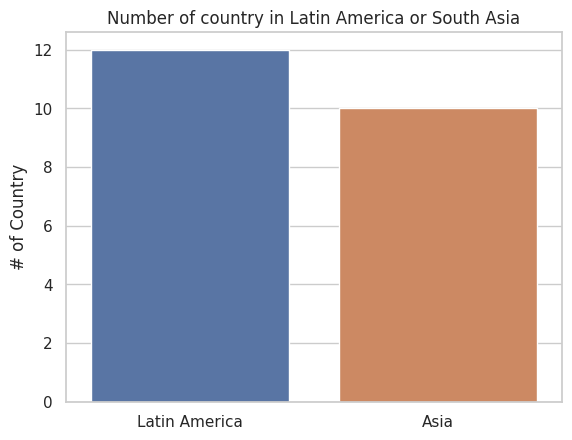

In [54]:
sns.set_theme(style="whitegrid") 
plt.title("Number of country in Latin America or South Asia")
plt.ylabel("# of Country")
sns.barplot(x=[0,1],
            y= [len(latin_df["Country Code"].value_counts()), len(asia_df["Country Code"].value_counts())]
            )
plt.xticks([0,1], ["Latin America", "Asia"])
plt.show()